<p style="font-family: helvetica,arial,sans-serif; font-size:2.0em;color:white; background-color: black;">&emsp;<b>EDA: Compare Pedestrian Traffic before Covid to now</b></p>
    
<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:black; background-color: #DDDDDD; text-align:justify">&emsp;<b>Authored by: </b> Brendan Richards, Barkha Javed</p>

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black; text-align:right"> <b>Duration:</b> 90 mins&emsp;</p>

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:black; background-color: #DDDDDD; text-align:justify">&emsp;<b>Level: </b>Intermediate&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<b>Pre-requisite Skills:</b>Python</p>

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black">&emsp;<b>Scenario</b>

# Business & Activity 
As a small business owner, I want to understand how covid affected foot traffic, and how long it might take to return to normal. I'd also like deeper insights into how different activities can impact pedestrian traffic.

 Factors impacting traffic include those listed below, we will be examining some of these in depth:
- Seasonality through temperature, severe weather events,  daylight savings, public holidays such as Christmas, school holidays, 
- Time of day, day of week
- Major events such as the AFL, concerts and exhibitions
- Proximity to public transport: Trains / Buses / Trams
- Number of local residences
- Number of people travelling into the CBD
- Covid cases and status
- Other venues in proximity - schools, universities, parks, retail outlets, restaurants, bars, clubs, cinemas

This exploratory data analysis looks at <b><i>Covid impact on foot traffic</b></i>.

### Data Preparation

In [91]:
#load libraries
import pandas as pd
import requests
import io
import seaborn as sns; sns.set()

from sodapy import Socrata

import warnings
warnings.filterwarnings('ignore')

In [93]:
#Uncomment the below to open data source, download sensor data, and store it as a csv locally.
#Function to get Sensor count history data
#def sensor_count():
#     client = Socrata('data.melbourne.vic.gov.au', '9UAGAvkem9fqXDhBLElapjazL', None)
#     sensor_data_id = "b2ak-trbp"
#     results = client.get(sensor_data_id, limit=5000000)
#     df = pd.DataFrame.from_records(results)
#     df = df[['date_time', 'year', 'month', 'mdate', 'day', 'time', 'sensor_id', 'sensor_name', 'hourly_counts']]
#     return df

#sensor_history = sensor_count()
#sensor_history.to_csv('sensor_history.csv', index=False)

sensor_history = pd.read_csv('sensor_history.csv')

In [96]:
sensor_history.info()
sensor_history.describe()
sensor_history.head(10)

#Add date column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4415574 entries, 0 to 4415573
Data columns (total 9 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   date_time      object
 1   year           int64 
 2   month          object
 3   mdate          int64 
 4   day            object
 5   time           int64 
 6   sensor_id      int64 
 7   sensor_name    object
 8   hourly_counts  int64 
dtypes: int64(5), object(4)
memory usage: 303.2+ MB


,date_time,year,month,mdate,day,time,sensor_id,sensor_name,hourly_counts
0,2019-11-01T17:00:00.000,2019,November,1,Friday,17,34,Flinders St-Spark La,300
1,2019-11-01T17:00:00.000,2019,November,1,Friday,17,39,Alfred Place,604
2,2019-11-01T17:00:00.000,2019,November,1,Friday,17,37,Lygon St (East),216
3,2019-11-01T17:00:00.000,2019,November,1,Friday,17,40,Lonsdale St-Spring St (West),627
4,2019-11-01T17:00:00.000,2019,November,1,Friday,17,36,Queen St (West),774
5,2019-11-01T17:00:00.000,2019,November,1,Friday,17,29,St Kilda Rd-Alexandra Gardens,644
6,2019-11-01T17:00:00.000,2019,November,1,Friday,17,42,Grattan St-Swanston St (West),453
7,2019-11-01T17:00:00.000,2019,November,1,Friday,17,43,Monash Rd-Swanston St (West),387
8,2019-11-01T17:00:00.000,2019,November,1,Friday,17,44,Tin Alley-Swanston St (West),27
9,2019-11-01T17:00:00.000,2019,November,1,Friday,17,35,Southbank,2691


In [43]:
#download covid datasets
url = "https://raw.githubusercontent.com/M3IT/COVID-19_Data/master/Data/COVID_AU_deaths.csv"
download = requests.get(url).content
df_deaths= pd.read_csv(io.StringIO(download.decode('utf-8')))

url = "https://raw.githubusercontent.com/M3IT/COVID-19_Data/master/Data/COVID_AU_state.csv"
download = requests.get(url).content
df_cases= pd.read_csv(io.StringIO(download.decode('utf-8')))

url = "https://raw.githubusercontent.com/M3IT/COVID-19_Data/master/Data/COVID_Data_Hub_State.csv"
download = requests.get(url).content
df_hub= pd.read_csv(io.StringIO(download.decode('utf-8')))


          date state  age age_bracket  gender  dd  state_cumulative
11  2020-03-26   VIC  0.0       70-79    Male  70                 1
12  2020-03-26   VIC  0.0       70-79    Male  70                 2
13  2020-03-26   VIC  0.0       70-79    Male  70                 3
16  2020-03-29   VIC  0.0       80-89    Male  80                 4
23  2020-04-02   VIC  0.0       70-79  Female  70                 5 

               age  state_cumulative
count  5133.000000       5133.000000
mean      0.012858       2567.000000
std       0.741955       1481.913796
min       0.000000          1.000000
25%       0.000000       1284.000000
50%       0.000000       2567.000000
75%       0.000000       3850.000000
max      51.000000       5133.000000 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5133 entries, 11 to 13116
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              5133 non-null   object 
 1   s

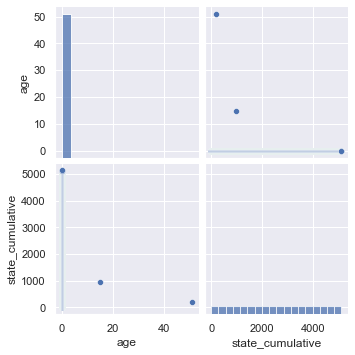

In [87]:
#look at VIC data
options = ['VIC']
  
# selecting rows based on condition
df = df_deaths[df_deaths['state'].isin(options)]
ds1 = df.fillna(0)

print (ds1.head(), '\n')
print (ds1.describe(), '\n')
print (ds1.info())
print("\nTotal number of missing values is","{:,d}".format(ds1.isnull().values.sum()))
print("\nColumn-wise distribution of null values\n",ds1.isnull().sum())
sns.pairplot(ds1)

In [77]:
#look at VIC data
options = ['VIC']
  
# selecting rows based on condition
ds = df_cases[df_cases['state_abbrev'].isin(options)]
ds_cases = ds[['date','state_abbrev','confirmed','deaths','positives','vaccines']]

print (ds_cases.head(), '\n')
print (ds_cases.describe(), '\n')
print (ds_cases.info())
print("\nTotal number of missing values is","{:,d}".format(ds_cases.isnull().values.sum()))
print("\nColumn-wise distribution of null values\n",ds_cases.isnull().sum())


          date state_abbrev  confirmed  deaths  positives  vaccines
6   2020-01-25          VIC          1       0          1         0
14  2020-01-26          VIC          0       0          0         0
22  2020-01-27          VIC          0       0          0         0
30  2020-01-28          VIC          0       0          0         0
38  2020-01-29          VIC          2       0          2         0 

           confirmed      deaths      positives       vaccines
count     942.000000  942.000000     942.000000     942.000000
mean     2699.791932    5.449045    2699.791932   17083.459660
std      9276.792803    9.324305    9276.792803   26046.692982
min     -2350.000000    0.000000   -2350.000000  -81162.000000
25%         2.000000    0.000000       2.000000       0.000000
50%        29.000000    0.000000      29.000000    2401.500000
75%      2260.750000    8.000000    2260.750000   24787.500000
max    255050.000000  107.000000  255050.000000  131513.000000 

<class 'pandas.core.f

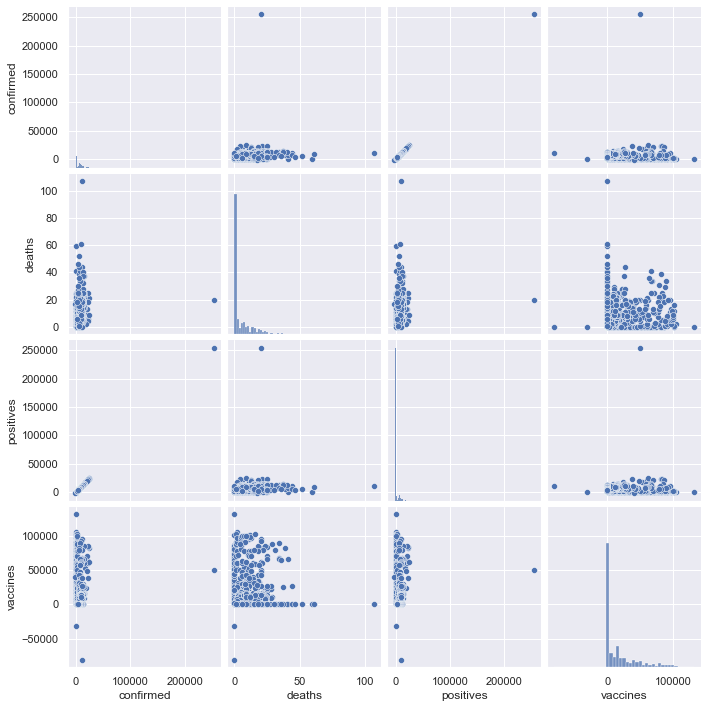

In [78]:
sns.pairplot(ds_cases)

In [82]:
#look at VIC data
options = ['Victoria']
  
# selecting rows based on condition
ds = df_hub[df_hub['administrative_area_level_2'].isin(options)]
ds_hub = ds[['date','confirmed','deaths','positives','people_vaccinated','people_fully_vaccinated','administrative_area_level_2']]

print (ds_hub.head(), '\n')
print (ds_hub.describe(), '\n')
print (ds_hub.info())
print("\nTotal number of missing values is","{:,d}".format(ds_hub.isnull().values.sum()))
print("\nColumn-wise distribution of null values\n",ds_hub.isnull().sum())


          date  confirmed  deaths  positives  people_vaccinated  \
6   2020-01-25          1       0          0                  0   
14  2020-01-26          1       0          0                  0   
22  2020-01-27          1       0          0                  0   
30  2020-01-28          1       0          0                  0   
38  2020-01-29          3       0          0                  0   

    people_fully_vaccinated administrative_area_level_2  
6                         0                    Victoria  
14                        0                    Victoria  
22                        0                    Victoria  
30                        0                    Victoria  
38                        0                    Victoria   

          confirmed       deaths     positives  people_vaccinated  \
count  9.420000e+02   942.000000  9.420000e+02       9.420000e+02   
mean   4.022693e+05  1257.408705  4.022692e+05       2.122756e+06   
std    7.293854e+05  1236.801846  7.2938

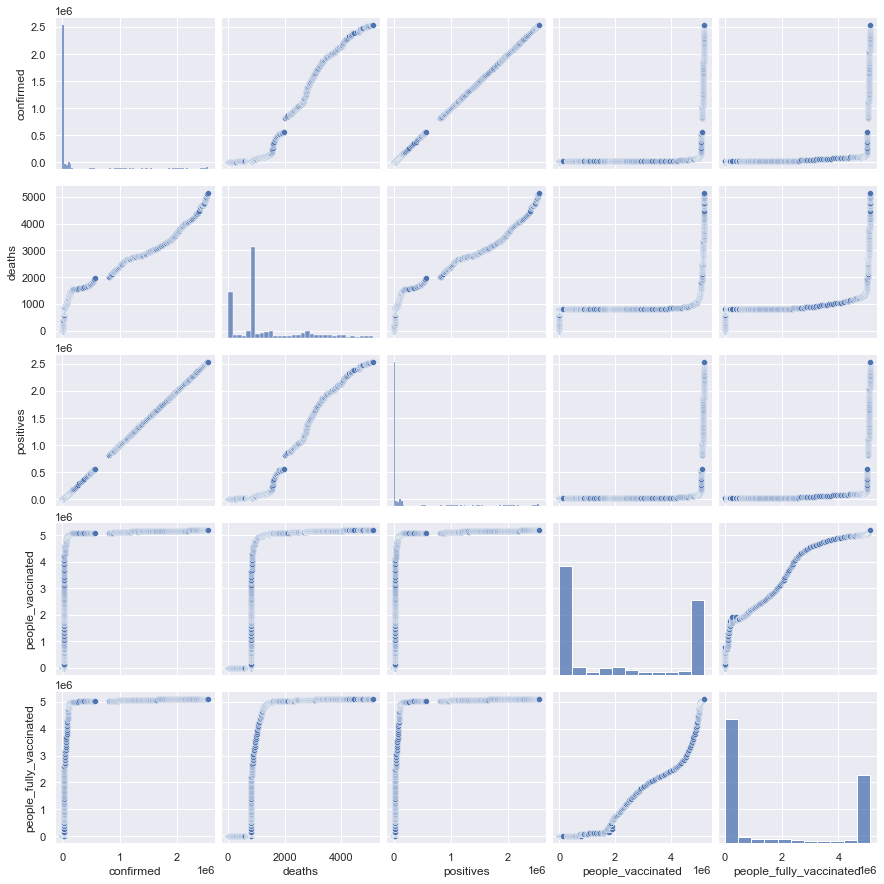

In [83]:
sns.pairplot(ds_hub)

In [ ]:
# Mesh Covid and foot traffic datasets


In [ ]:
# Examine

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black">&emsp;<b>References</b>

O'Brien J, et al., 2020, 'Covid 19 in Australia', covid19data.com.au, date retrieved 20 Aug 2022, <https://www.covid19data.com.au/>

City of Melbourne Open Data Team, 2014 - 2021,'Pedestrian Counting System - Monthly (counts per hour)', City of Melbourne, date retrieved 11 Aug 2022, <https://dev.socrata.com/foundry/data.melbourne.vic.gov.au/b2ak-trbp>




    